### Importamos librerías

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

### Cargamos nuestros datos

In [8]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

FileNotFoundError: [Errno 2] No such file or directory: 'data\\processed/train_set.npz'

### Entrenamos nuestro modelo con los datos de mayor correlación.

In [ ]:
gbr_params = {
        'learning_rate': [0.1, 0.5, 1.0],
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [3, 5, 10, 15],
        'random_state':[42]
}
grid_reg_corr = GridSearchCV(estimator = GradientBoostingRegressor(),
                  param_grid = gbr_params,
                  cv = 3)

In [ ]:
X_train_corr_scal, X_test_corr_scal = func.escala_estandar(train = X_train_corr, test = X_test_corr)

In [ ]:
grid_reg_corr.fit(X_train_corr_scal,y_train_corr)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [42]})

In [ ]:
print(grid_reg_corr.best_estimator_)
print(grid_reg_corr.best_score_)
print(grid_reg_corr.best_params_)

GradientBoostingRegressor(random_state=42)
0.8707384170556235
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}


### Efectuamos la predicción

In [ ]:
pred_corr = grid_reg_corr.best_estimator_.predict(X_test_corr_scal)

### Observamos lo resultados.

In [ ]:
func.muestra_metricas(data = y_test_corr, data_pred = pred_corr)

MAE: 0.7813058033619452
MSE: 1.5459498083247591
RMSE: 1.243362299703815
R2 score: 0.8864240556363804


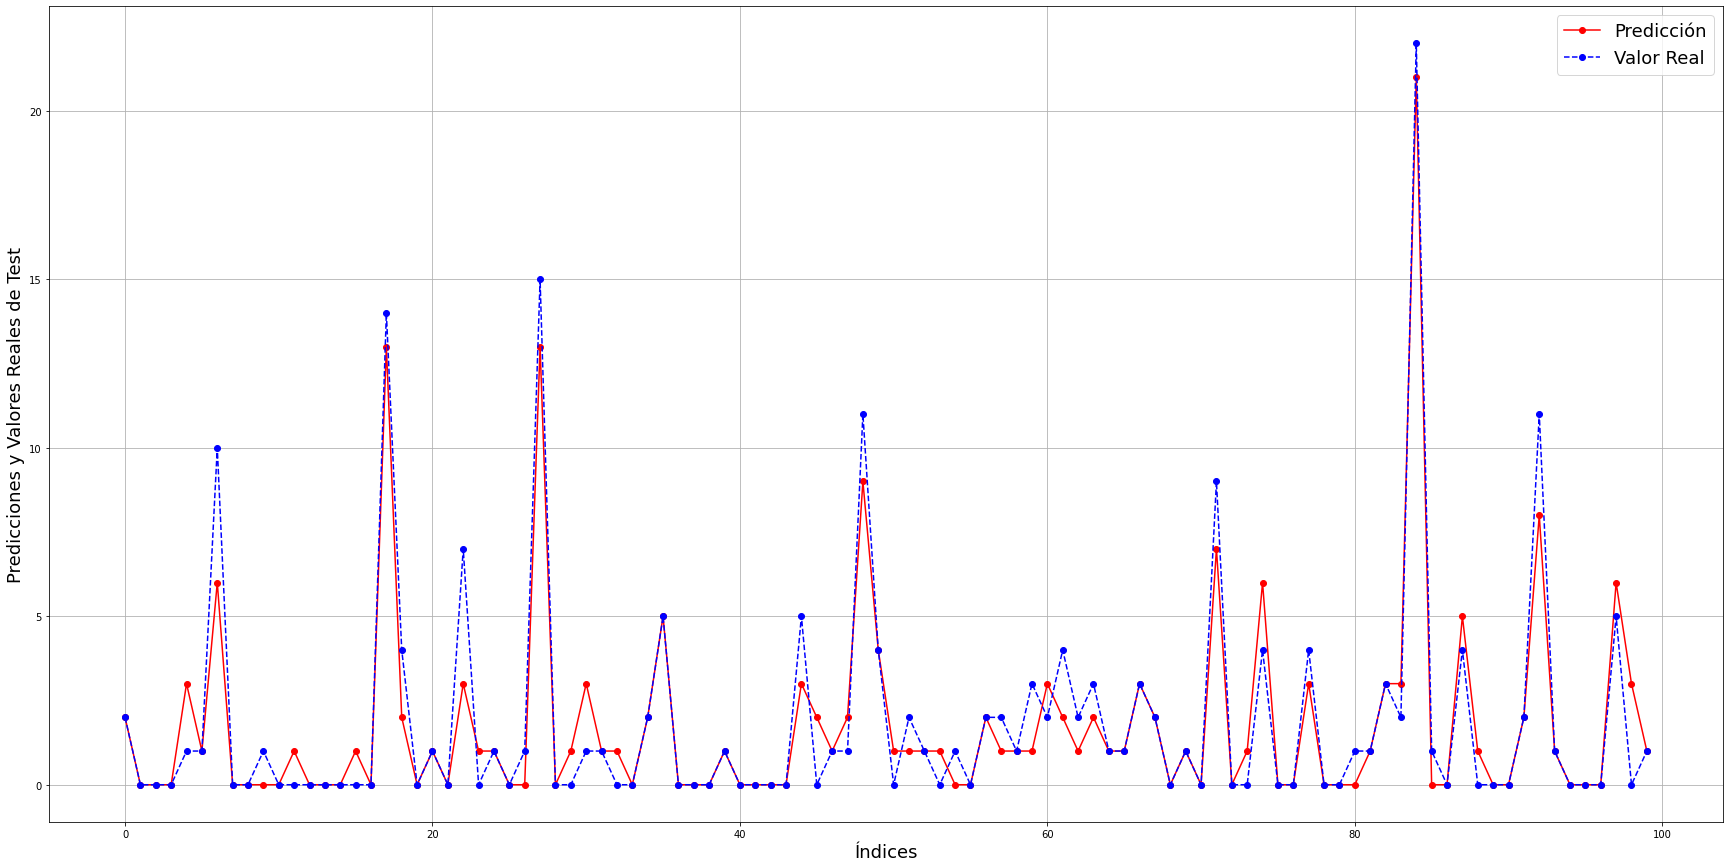

In [ ]:
func.muestra_pred(data = y_test_corr, data_pred = np.round(pred_corr,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Prediccion Gradient Boosting Corr.jpg" )

### Volvemos a entrenar, esta vez, utilizando todos los datos.

In [ ]:
X_train_scal, X_test_scal = func.escala_estandar(train = X_train, test = X_test)

In [ ]:
grid_reg_gb = GridSearchCV(estimator = GradientBoostingRegressor(),
                  param_grid = gbr_params,
                  cv = 3)

In [ ]:
grid_reg_gb.fit(X_train_scal,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [42]})

In [ ]:
print(grid_reg_gb.best_estimator_)
print(grid_reg_gb.best_score_)
print(grid_reg_gb.best_params_)

GradientBoostingRegressor(random_state=42)
0.8705596584512195
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'random_state': 42}


### Realizamos la predicción

In [ ]:
pred_gb = grid_reg_gb.best_estimator_.predict(X_test_scal)

### Observamos los resultados.

In [ ]:
func.muestra_metricas(data = y_test, data_pred = pred_gb)

MAE: 0.7841214726736451
MSE: 1.5670645037787028
RMSE: 1.2518244700351175
R2 score: 0.8848728270885852


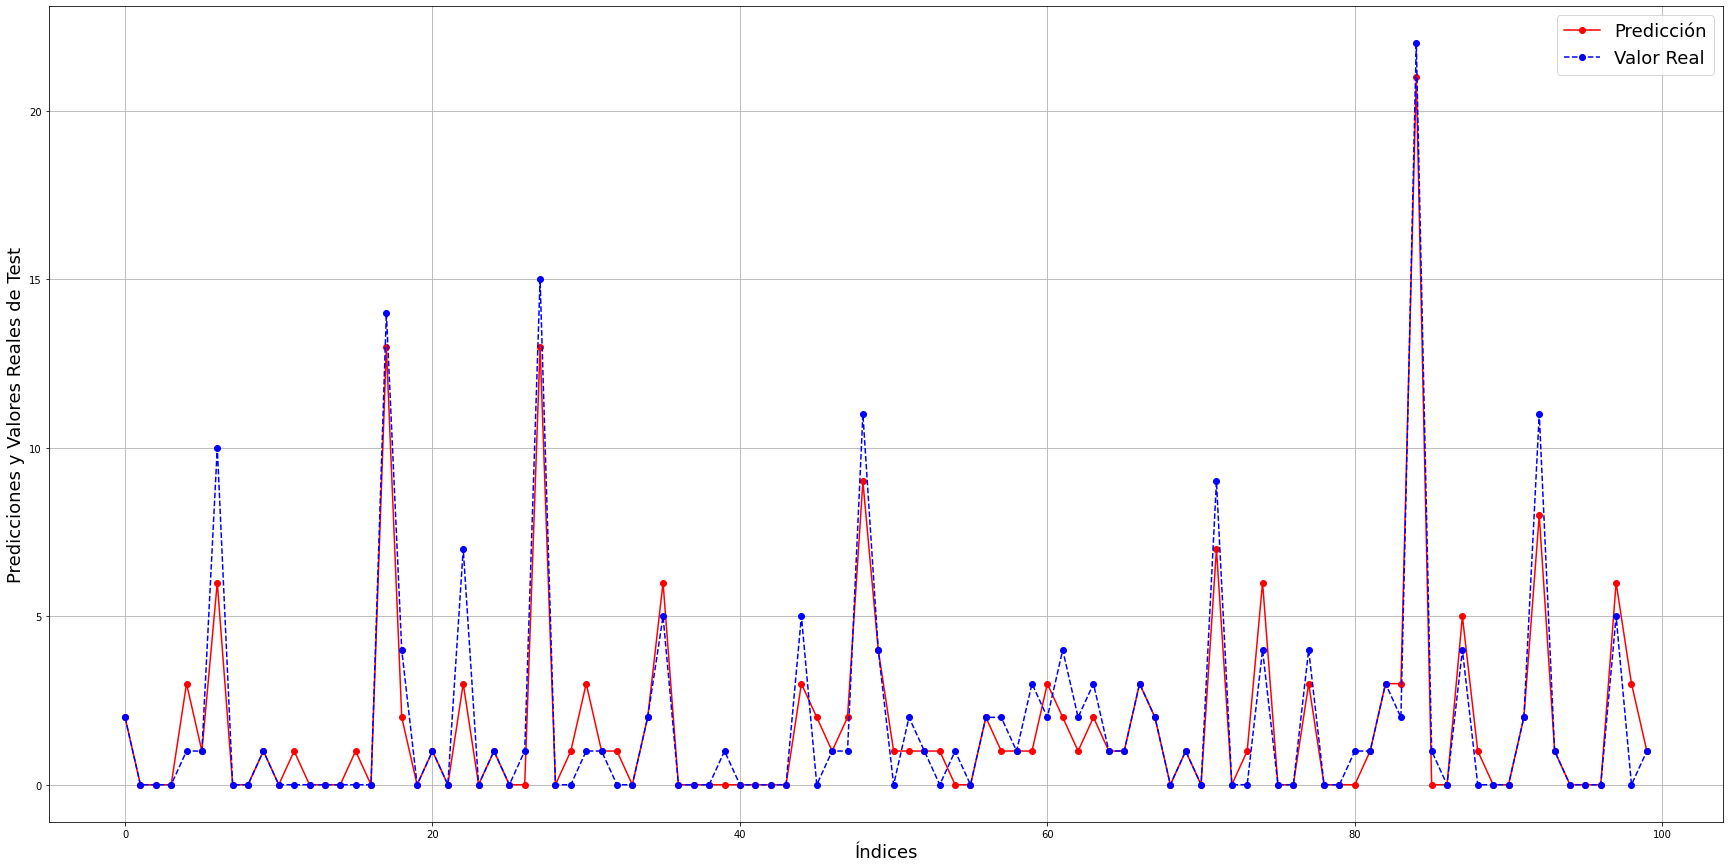

In [ ]:
func.muestra_pred(data = y_test, data_pred = np.round(pred_gb,0), long = 100, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\Prediccion Gradient Boosting Todos.jpg" )

### Guardamos el modelo

In [ ]:
func.guarda_modelo(modelo = grid_reg_gb.best_estimator_, path = "D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\models/rgb_reg.model")

In [ ]:
dict_pred = {'Valor Real': y_test_corr[70:91],'Predicción': np.round(pred_corr[70:91],0)}
df_prediccion = pd.DataFrame(dict_pred)
df_prediccion.to_csv('D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\processed\Prediciones gbt.csv', sep = ';')
df_prediccion

,Valor Real,Predicción
0,0.0,0.0
1,9.0,7.0
2,0.0,0.0
3,0.0,1.0
4,4.0,6.0
5,0.0,-0.0
6,0.0,0.0
7,4.0,3.0
8,0.0,0.0
9,0.0,0.0
